In [36]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import glob

In [37]:
def mean_and_std(data):
    trials = len(data)
    mean   = np.mean(data, axis=0)
    std    = np.std(data, axis=0)/np.sqrt(trials-1)
    return mean, std
def chop(a, warn = True):
    A = np.round(np.real(a),3)
    if np.all(np.isclose(A.astype(int), A)): return A.astype(int)
    else: return A

### Get Data

In [153]:
L = 12
end = 20
n = 3

here = True
pauli = True
Azero = True
Aplus = False
Amult = False
field_strength = 0.1
dot_strength = 1

prefix = "data/weights_L"+str(L)+"end"+str(end)+"n"+str(n)+"_"+str(int(here))+ \
         str(int(pauli))+"_"+str(int(Azero))+str(int(Aplus))+str(int(Amult))+ \
         "_f"+str(field_strength)+"d"+str(dot_strength)+"#"
fnames = glob.glob(prefix + "*.npy")

In [154]:
trials = len(fnames)
weights_site = np.zeros((trials, 2, L,   end*n))
weights_bond = np.zeros((trials, 2, L-1, end*n))
peakses_site = np.zeros((trials, 2, L))
peakses_bond = np.zeros((trials, 2, L-1))


for idx, fname in enumerate(fnames):
    _, _, weightfore, weightback = np.load(fname) # Other data are otocs
    
    for i in range(L):
        data = weightfore[i]
        for jdx, val in enumerate(data):
            if (val > data[jdx+1]): peakses_site[idx,0,i] = jdx; break
            if (jdx == 58): peakses_site[idx,0,i] = 59; break
        weights_site[idx,0,i] = data
        
        data = weightback[i]
        for jdx, val in enumerate(data):
            if (val > data[jdx+1]): peakses_site[idx,1,i] = jdx; break
            if (jdx == 58): peakses_site[idx,1,i] = 59; break
        weights_site[idx,1,i] = data

    for i in range(L-1):
        data = (weightfore[i]+weightfore[i+1])/2
        for jdx, val in enumerate(data):
            if (val > data[jdx+1]): peakses_bond[idx,0,i] = jdx; break
            if (jdx == 58): peakses_bond[idx,0,i] = 59; break
        weights_bond[idx,0,i] = data
        
        data = (weightback[i]+weightback[i+1])/2
        for jdx, val in enumerate(data):
            if (val > data[jdx+1]): peakses_bond[idx,1,i] = jdx; break
            if (jdx == 58): peakses_bond[idx,1,i] = 59; break
        weights_bond[idx,1,i] = data

### At Sites

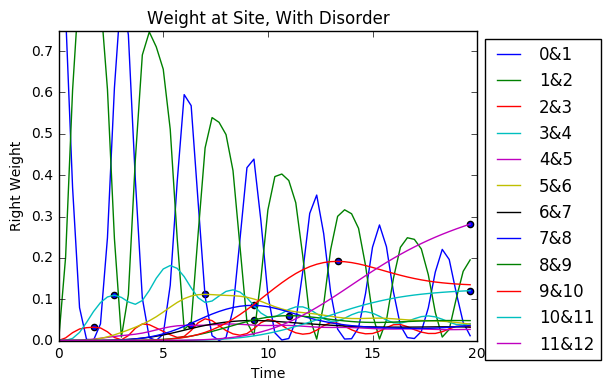

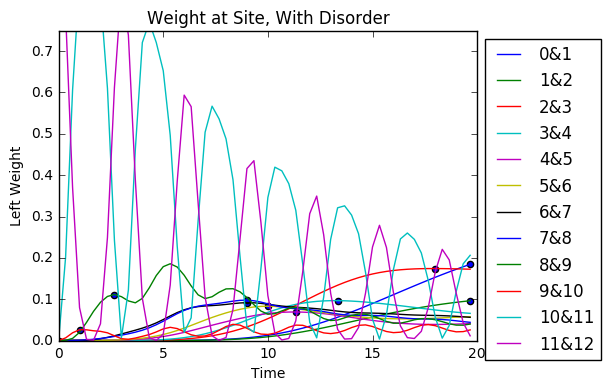

In [155]:
avg_weight, std_weight = mean_and_std(weights_site)

stop = n*end
peaks = np.zeros((2,L))
ax = plt.subplot(111)
for i in range(L):
    data = avg_weight[0,i]
    for jdx, val in enumerate(data):
        if (val > data[jdx+1]): peaks[0,i] = jdx; break
        if (jdx == 58): peaks[0,i] = 59; break
    peaks[0,0] = 0
    if (i%1==0): 
        ax.plot(np.arange(stop)/n,data[:stop], label = str(i)+'&'+str(i+1))
        ax.scatter(peaks[0,i]/n, data[(int)(peaks[0,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1, 1), loc=2)
plt.ylim(0,.75)
plt.xlim(0,end)
plt.ylabel('Right Weight')
plt.xlabel('Time')
plt.title('Weight at Site, With Disorder')
# plt.savefig('figures/avgRweightL13_s.pdf')
plt.show()

ax = plt.subplot(111)
for i in range(L):
    data = avg_weight[1,i]
    for jdx, val in enumerate(data):
        if (val > data[jdx+1]): peaks[1,i] = jdx; break
        if (jdx == 58): peaks[1,i] = 59; break
    peaks[1,L-2]=0
    if (i%1==0): 
        ax.plot(np.arange(stop)/n,data[:stop], label = str(i)+'&'+str(i+1))
        ax.scatter(peaks[1,i]/n, data[(int)(peaks[1,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1, 1), loc=2)
plt.ylim(0,.75)
plt.xlim(0,end)
plt.ylabel('Left Weight')
plt.xlabel('Time')
plt.title('Weight at Site, With Disorder')
# plt.savefig('figures/avgLweightL13_s.pdf')
plt.show()

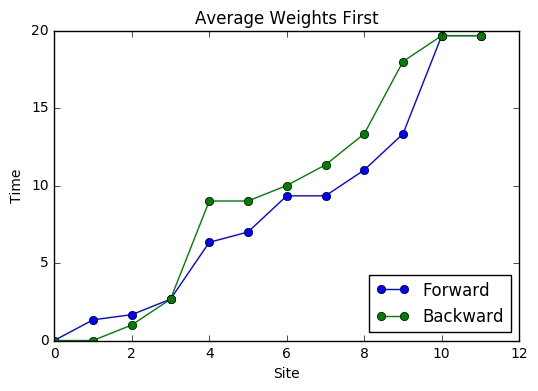

In [156]:
plt.plot(range(L),peaks[0]/n, 'o-', label="Forward")
plt.plot(range(L),peaks[1][::-1]/n, 'o-', label="Backward")
plt.ylabel('Time')
plt.xlabel('Site')
plt.legend(loc=4)
plt.title("Average Weights First")
# plt.savefig('figures/avgPeaksL13_1s.pdf')
plt.show()

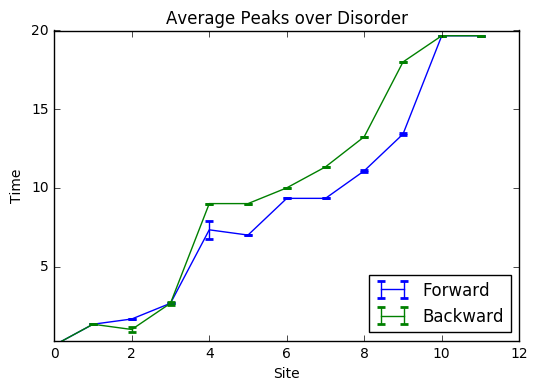

In [157]:
avg_peaks, std_peaks = mean_and_std(peakses_site)
plt.errorbar(range(L),avg_peaks[0]/n, yerr=std_peaks[0]/n, capthick=2, label="Forward")
plt.errorbar(range(L),avg_peaks[1][::-1]/n, yerr=std_peaks[1]/n, capthick=2, label="Backward")
plt.ylabel('Time')
plt.xlabel('Site')
plt.ylim(0.3)
plt.legend(loc=4)
# plt.savefig('figures/avgPeaksL13_2s.pdf')
plt.title('Average Peaks over Disorder')
plt.show()

In [158]:
print(peaks/n)
print(chop(avg_peaks/n))

[[ 0.          1.33333333  1.66666667  2.66666667  6.33333333  7.
   9.33333333  9.33333333 11.         13.33333333 19.66666667 19.66666667]
 [19.66666667 19.66666667 18.         13.33333333 11.33333333 10.
   9.          9.          2.66666667  1.          0.          0.        ]]
[[ 0.     1.333  1.667  2.667  7.333  7.     9.333  9.333 11.083 13.417
  19.667 19.667]
 [19.667 19.667 18.    13.25  11.333 10.     9.     9.     2.667  1.
   1.333  0.   ]]


### At Bonds

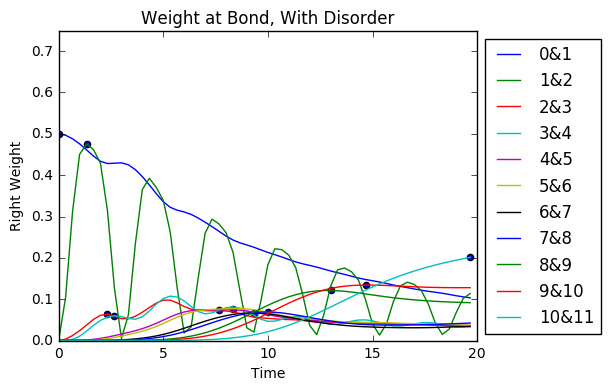

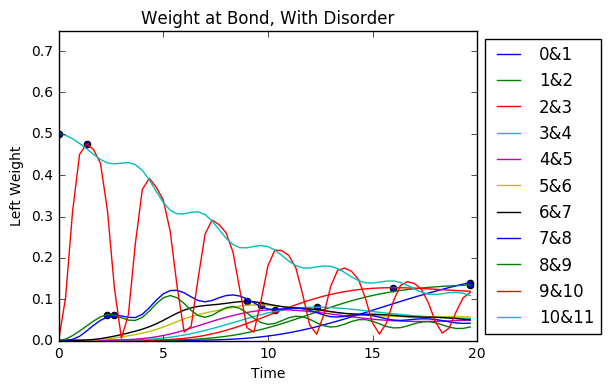

In [159]:
avg_weight, std_weight = mean_and_std(weights_bond)

stop = n*end
peaks = np.zeros((2,L-1))
ax = plt.subplot(111)
for i in range(L-1):
    data = avg_weight[0,i]
    for jdx, val in enumerate(data):
        if (val > data[jdx+1]): peaks[0,i] = jdx; break
        if (jdx == 58): peaks[0,i] = 59; break
    peaks[0,0] = 0
    if (i%1==0): 
        ax.plot(np.arange(stop)/n,data[:stop], label = str(i)+'&'+str(i+1))
        ax.scatter(peaks[0,i]/n, data[(int)(peaks[0,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1, 1), loc=2)
plt.ylim(0,.75)
plt.xlim(0,end)
plt.ylabel('Right Weight')
plt.xlabel('Time')
plt.title('Weight at Bond, With Disorder')
# plt.savefig('figures/avgRweightL13_b.pdf')
plt.show()

ax = plt.subplot(111)
for i in range(L-1):
    data = avg_weight[1,i]
    for jdx, val in enumerate(data):
        if (val > data[jdx+1]): peaks[1,i] = jdx; break
        if (jdx == 58): peaks[1,i] = 59; break
    peaks[1,L-2]=0
    if (i%1==0): 
        ax.plot(np.arange(stop)/n,data[:stop], label = str(i)+'&'+str(i+1))
        ax.scatter(peaks[1,i]/n, data[(int)(peaks[1,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1, 1), loc=2)
plt.ylim(0,.75)
plt.xlim(0,end)
plt.ylabel('Left Weight')
plt.xlabel('Time')
plt.title('Weight at Bond, With Disorder')
# plt.savefig('figures/avgLweightL13_b.pdf')
plt.show()

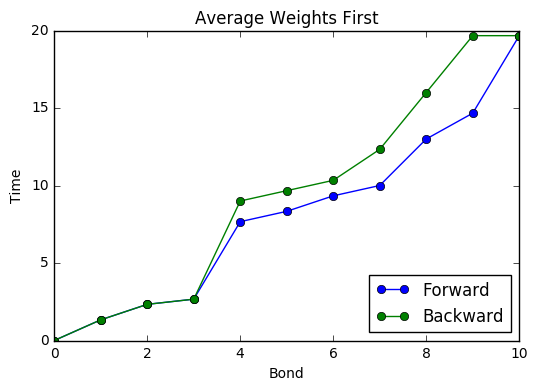

In [160]:
plt.plot(range(L-1),peaks[0]/n, 'o-', label="Forward")
plt.plot(range(L-1),peaks[1][::-1]/n, 'o-', label="Backward")
plt.ylabel('Time')
plt.xlabel('Bond')
plt.legend(loc=4)
plt.title("Average Weights First")
# plt.savefig('figures/avgPeaksL13_1b.pdf')
plt.show()

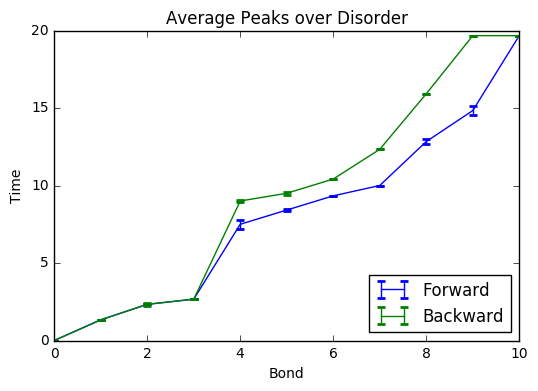

In [161]:
avg_peaks, std_peaks = mean_and_std(peakses_bond)
plt.errorbar(range(L-1),avg_peaks[0]/n, yerr=std_peaks[0]/n, capthick=2, label="Forward")
plt.errorbar(range(L-1),avg_peaks[1][::-1]/n, yerr=std_peaks[1]/n, capthick=2, label="Backward")
plt.ylabel('Time')
plt.xlabel('Bond')
plt.legend(loc=4)
# plt.savefig('figures/avgPeaksL13_2b.pdf')
plt.title('Average Peaks over Disorder')
plt.show()

In [162]:
print(peaks/n)
print(chop(avg_peaks/n))

[[ 0.          1.33333333  2.33333333  2.66666667  7.66666667  8.33333333
   9.33333333 10.         13.         14.66666667 19.66666667]
 [19.66666667 19.66666667 16.         12.33333333 10.33333333  9.66666667
   9.          2.66666667  2.33333333  1.33333333  0.        ]]
[[ 0.     1.333  2.333  2.667  7.5    8.417  9.333 10.    12.833 14.833
  19.667]
 [19.667 19.667 15.917 12.333 10.417  9.5    9.     2.667  2.333  1.333
   0.   ]]


In [163]:
fnames

['data/weights_L12end20n3_11_100_f0.1d1#1.npy',
 'data/weights_L12end20n3_11_100_f0.1d1#0.npy',
 'data/weights_L12end20n3_11_100_f0.1d1#2.npy',
 'data/weights_L12end20n3_11_100_f0.1d1#3.npy']